In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd "drive/My Drive/Colab Notebooks"

In [0]:
IMG_DIR = 'frame-14.jpg'
img = cv2.imread(IMG_DIR)
# cv2_imshow(img)

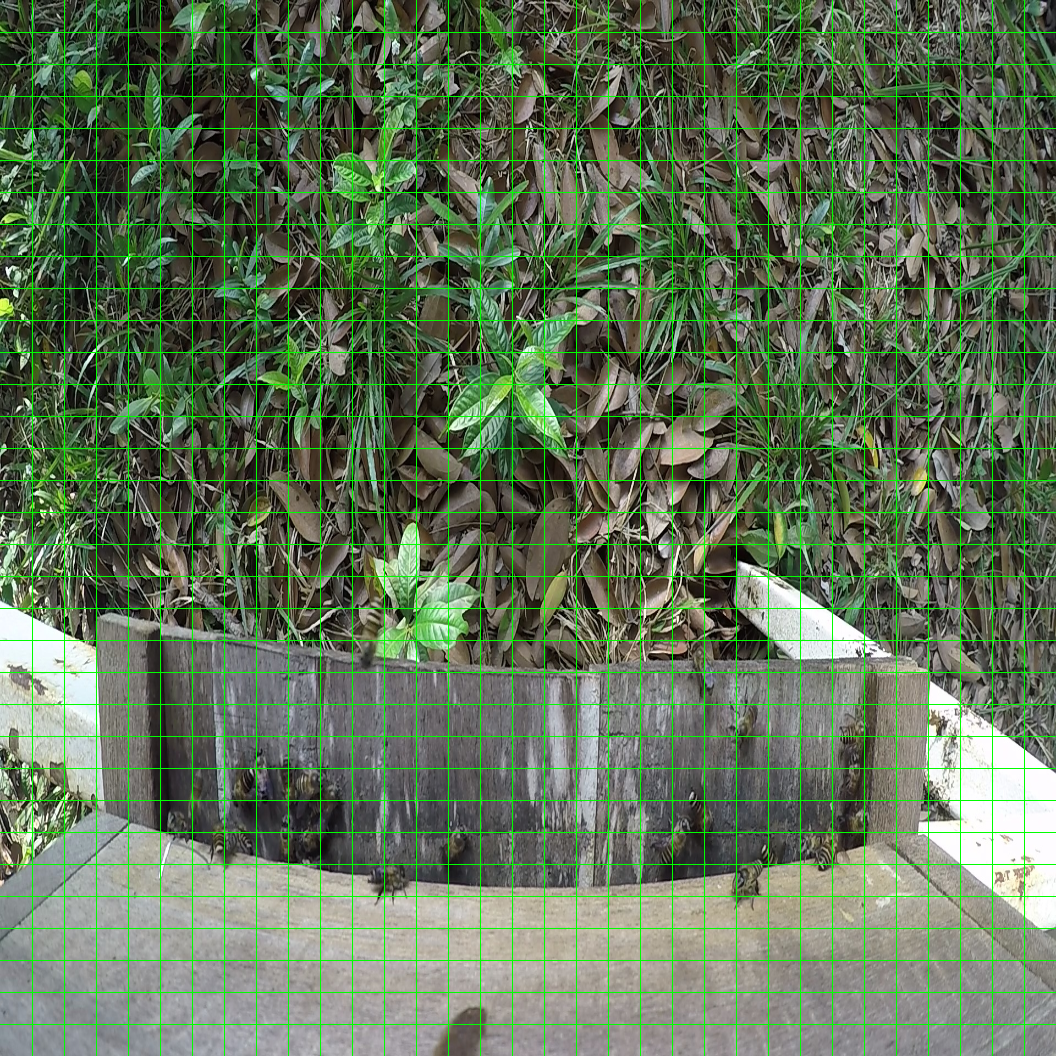

In [0]:
# Draw grid
reshaped_img = cv2.resize(img, (1056, 1056))

for i in range(1, 33):
    cv2.line(reshaped_img, (i * 32, 0), (i * 32, 1056), (0, 255, 0), 1, 1)
    cv2.line(reshaped_img, (0, i * 32), (1056, i * 32), (0, 255, 0), 1, 1)
cv2_imshow(reshaped_img)

In [0]:
# Flip Image
img_flipped = cv2.flip(img, 1)
cv2_imshow(img_flipped)

In [0]:
# Gaussian Blur
img_gaussian_blur = cv2.GaussianBlur(img, (7, 7), 0)
cv2_imshow(img_gaussian_blur)

In [0]:
# Sharpening
kernel = np.array([[-1, -1, -1], [-1, 9.5, -1], [-1, -1, -1]])
img_sharpened = cv2.filter2D(img, -1, kernel)
cv2_imshow(img_sharpened)

In [0]:
# Gaussian Noise
mean = 0
var = 2
sigma = var ** 0.5

gaussian = np.random.normal(mean, sigma, (img.shape[0], img.shape[1], 3)) * 15
img_gaussian_noise = img + gaussian

cv2.normalize(img_gaussian_noise, img_gaussian_noise, 0, 255, cv2.NORM_MINMAX, dtype=-1)

cv2_imshow(img_gaussian_noise)

In [0]:
# Decrease brightness
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
value = 30

lim = 0 + value

v[v < lim] = 0
v[v >= lim] -= value

final_hsv = cv2.merge((h, s, v))
img_brightness = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

cv2_imshow(img_brightness)

In [0]:
# Increase contrast
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
value = 30

lim = 255 - value

s[s > lim] = 255
s[s <= lim] += value

final_hsv = cv2.merge((h, s, v))
img_contrast = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

cv2_imshow(img_contrast)